<a href="https://colab.research.google.com/github/kruthi349/Data-Analytics-Project/blob/main/Coffe_Shop_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('/content/Raw dataset.xlsx')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [5]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [6]:
df.isnull().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:

# Calculate Total Sales
df['Total Sales'] = df['transaction_qty'] * df['unit_price']

# Convert date and time
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time

# Extract features
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month_name()
df['day_of_week'] = df['transaction_date'].dt.day_name()
df['hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour


In [9]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  Total Sales       149116 non-null  float64       
 12  year              149116 non-null  int32         
 13  month             149116 non-null  object        
 14  day_

In [10]:
print(df['day_of_week'])

0         Sunday
1         Sunday
2         Sunday
3         Sunday
4         Sunday
           ...  
149111    Friday
149112    Friday
149113    Friday
149114    Friday
149115    Friday
Name: day_of_week, Length: 149116, dtype: object


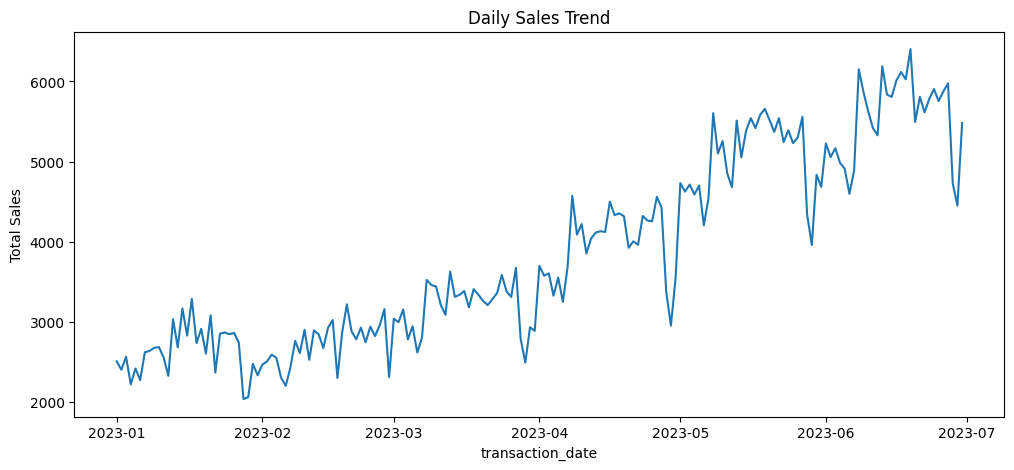

In [11]:
sales_trend = df.groupby('transaction_date')['Total Sales'].sum().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(data=sales_trend, x='transaction_date', y='Total Sales')
plt.title('Daily Sales Trend')
plt.show()


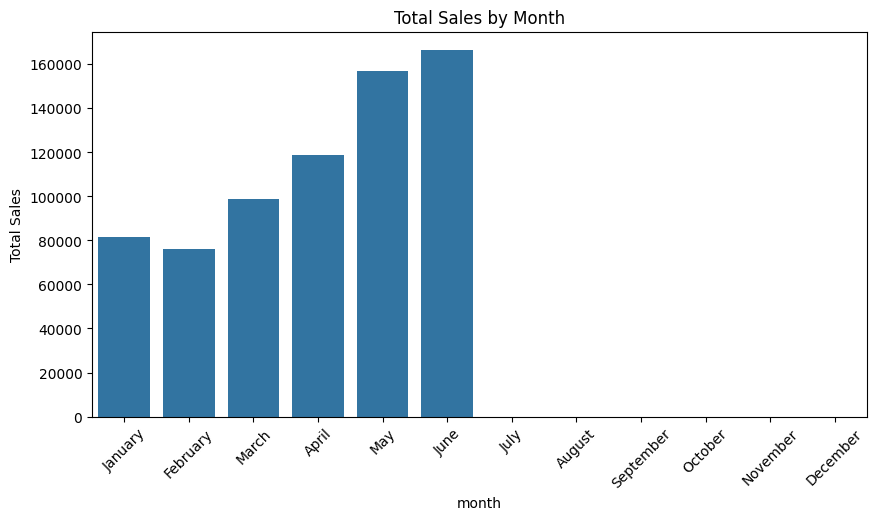

In [12]:
month_sales = df.groupby('month')['Total Sales'].sum().reindex(
    ['January','February','March','April','May','June','July','August','September','October','November','December']
).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=month_sales, x='month', y='Total Sales')
plt.xticks(rotation=45)
plt.title('Total Sales by Month')
plt.show()


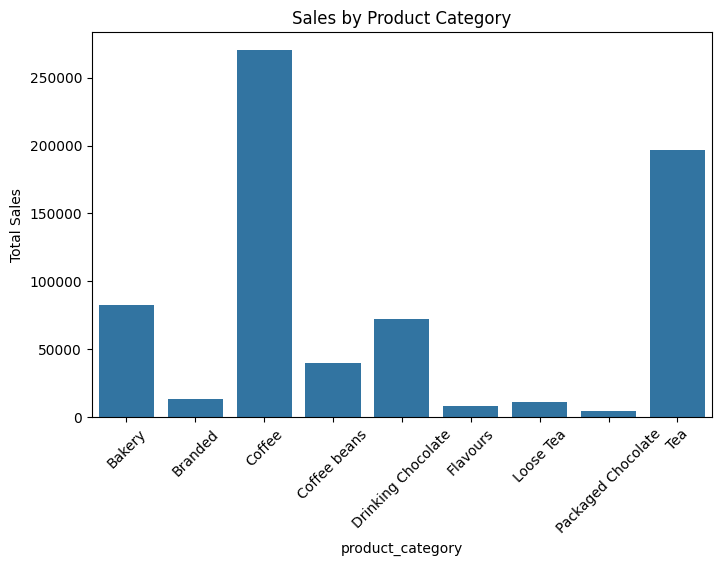

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(data=df.groupby('product_category', as_index=False)['Total Sales'].sum(),
            x='product_category', y='Total Sales')
plt.title('Sales by Product Category')
plt.xticks(rotation=45)
plt.show()


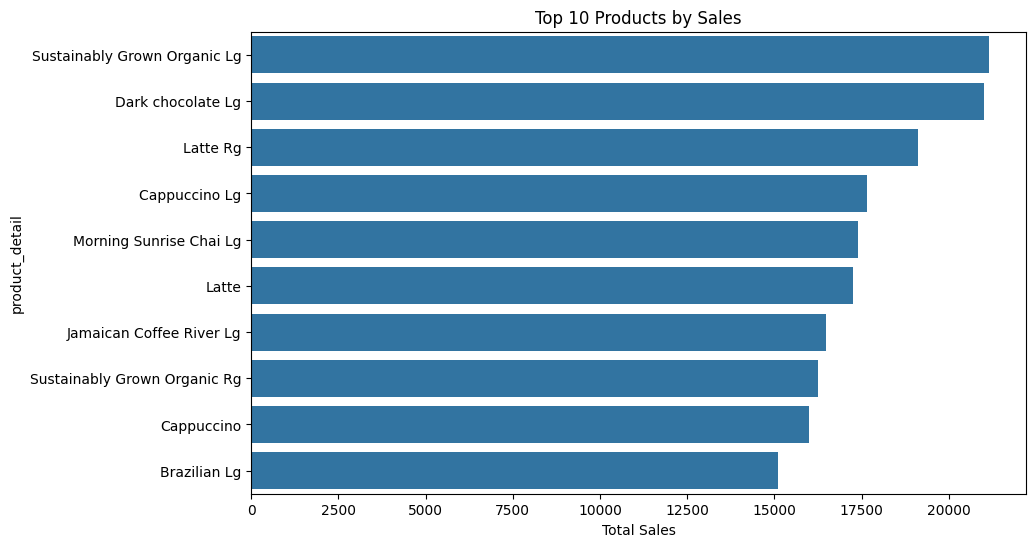

In [14]:
top_products = df.groupby('product_detail')['Total Sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=top_products, y='product_detail', x='Total Sales')
plt.title('Top 10 Products by Sales')
plt.show()


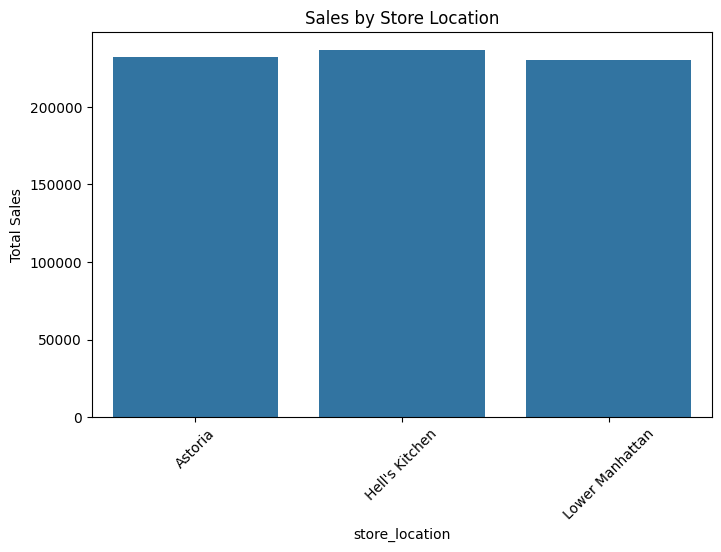

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(data=df.groupby('store_location', as_index=False)['Total Sales'].sum(),
            x='store_location', y='Total Sales')
plt.title('Sales by Store Location')
plt.xticks(rotation=45)
plt.show()


In [16]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Total Sales,year,month,day_of_week,hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023,January,Sunday,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023,January,Sunday,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023,January,Sunday,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023,January,Sunday,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023,January,Sunday,7
